## About data

Our data contains the information about sepal length, sepal width, petal length, petal width and variety of different flowers.
It is a multi-class categorical data.

Here we will use Neural Network to predict the variety of flowers.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing and Exploring the Dataset

In [3]:
data=pd.read_csv('iris.csv')

In [4]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### Splitting the dataset by making dummies

In [5]:
data = pd.get_dummies(data)

In [6]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [7]:
x = data.drop(columns=['variety_Setosa','variety_Versicolor','variety_Virginica'])
y = data.loc[:,['variety_Setosa','variety_Versicolor','variety_Virginica']]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=0.8, random_state=2)

In [9]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


In [10]:
#Importing the models
from keras.models import Sequential
from keras.layers import Dense

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [12]:
# Function for making the N-Layer Neural Network

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [13]:
#Compiling the data with loss function categorical cross entropy since it is multiclass problem with optimizer adam and metrics accuracy

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
#Fitting the data
history = model.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 1.5809 - accuracy: 0.3333
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3271 - accuracy: 0.3333
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1644 - accuracy: 0.5167
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0882 - accuracy: 0.6417
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0379 - accuracy: 0.5750
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0112 - accuracy: 0.6500
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9743 - accuracy: 0.6667
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 0.9299 - accuracy: 0.6667
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.8901 - accuracy: 0.6667
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.8624 - accuracy: 0.6667
Epoch 11/200
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9583
Epoch 85/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9750
Epoch 86/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.9667
Epoch 87/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1431 - accuracy: 0.9583
Epoch 88/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.9583
Epoch 89/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1376 - accuracy: 0.9750
Epoch 90/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9750
Epoch 91/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9583
Epoch 92/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1326 - accuracy: 0.9750
Epoch 93/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9750
Epoch 94/200
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9833
Epoch 168/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0835 - accuracy: 0.9750
Epoch 169/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0814 - accuracy: 0.9833
Epoch 170/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0797 - accuracy: 0.9833
Epoch 171/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9833
Epoch 172/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0799 - accuracy: 0.9833
Epoch 173/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0797 - accuracy: 0.9833
Epoch 174/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9833
Epoch 175/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.9750
Epoch 176/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0789 - accuracy: 0.9833
Epoch 177/200
4/4 [=====

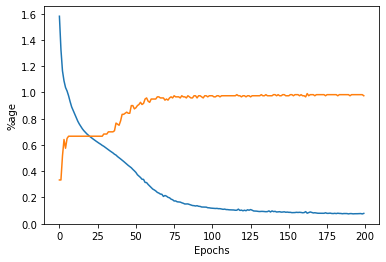

In [15]:
#Plot for loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('%age')
plt.show()

In [16]:
# Test accuracy
test_eval = model.evaluate(x_test,y_test, verbose=1)

1/1 [==============================] - 0s 358ms/step - loss: 0.0373 - accuracy: 0.9667


In [17]:
#Train accuracy
train_eval = model.evaluate(x_train,y_train, verbose=1)

4/4 [==============================] - 0s 6ms/step - loss: 0.0739 - accuracy: 0.9833


In [18]:
#Prediction
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 210ms/step


In [19]:
y_pred[3]

array([3.6039505e-06, 1.5213785e-03, 9.9847502e-01], dtype=float32)

In [20]:
# maximum value of the argument of index 3
np.argmax(y_pred[3])

2

In [21]:
# storing the maximum value of each prediction into a variable

ind = [np.argmax(y_pred[i]) for i in range(0,len(y_pred))]

In [22]:
#Naming the predicted values

classes = ['setosa','versicolor','virginica']
y_pred_class = [classes[i] for i in ind]

In [23]:
y_pred_class

['virginica',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'virginica']

In [24]:
# Adding the predicted value in the data
x_test['Pred Y'] = y_pred_class

In [25]:
x_test

,sepal.length,sepal.width,petal.length,petal.width,Pred Y
145,6.7,3.0,5.2,2.3,virginica
20,5.4,3.4,1.7,0.2,setosa
26,5.0,3.4,1.6,0.4,setosa
108,6.7,2.5,5.8,1.8,virginica
58,6.6,2.9,4.6,1.3,versicolor
22,4.6,3.6,1.0,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica


In [26]:
#Concatinating the test values of x and y

pd.concat([x_test,y_test], axis=1)   #axis=1 means column wise

,sepal.length,sepal.width,petal.length,petal.width,Pred Y,variety_Setosa,variety_Versicolor,variety_Virginica
145,6.7,3.0,5.2,2.3,virginica,0,0,1
20,5.4,3.4,1.7,0.2,setosa,1,0,0
26,5.0,3.4,1.6,0.4,setosa,1,0,0
108,6.7,2.5,5.8,1.8,virginica,0,0,1
58,6.6,2.9,4.6,1.3,versicolor,0,1,0
22,4.6,3.6,1.0,0.2,setosa,1,0,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
13,4.3,3.0,1.1,0.1,setosa,1,0,0
118,7.7,2.6,6.9,2.3,virginica,0,0,1
122,7.7,2.8,6.7,2.0,virginica,0,0,1


## Validation

In [27]:
#Renaming the y test 
y_test.columns=['setosa','versicolor','virginica']

In [28]:
# Reversing the dummies into names 

y_actual = y_test.idxmax(axis=1)

In [29]:
x_test['Actual Y'] = y_actual

In [30]:
x_test

,sepal.length,sepal.width,petal.length,petal.width,Pred Y,Actual Y
145,6.7,3.0,5.2,2.3,virginica,virginica
20,5.4,3.4,1.7,0.2,setosa,setosa
26,5.0,3.4,1.6,0.4,setosa,setosa
108,6.7,2.5,5.8,1.8,virginica,virginica
58,6.6,2.9,4.6,1.3,versicolor,versicolor
22,4.6,3.6,1.0,0.2,setosa,setosa
36,5.5,3.5,1.3,0.2,setosa,setosa
13,4.3,3.0,1.1,0.1,setosa,setosa
118,7.7,2.6,6.9,2.3,virginica,virginica
122,7.7,2.8,6.7,2.0,virginica,virginica


In [31]:
#Crosstabulation of predicted and the actual values 
pd.crosstab(x_test['Pred Y'],x_test['Actual Y'])

Actual Y,setosa,versicolor,virginica
Pred Y,,,
setosa,10,0,0
versicolor,0,9,0
virginica,0,1,10


In [32]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
#Using LabelEncoder to transform predicted and actual values

x_test['Pred Y'] = le.fit_transform(x_test['Pred Y'])
x_test['Actual Y'] = le.fit_transform(x_test['Actual Y'])

In [35]:
x_test

,sepal.length,sepal.width,petal.length,petal.width,Pred Y,Actual Y
145,6.7,3.0,5.2,2.3,2,2
20,5.4,3.4,1.7,0.2,0,0
26,5.0,3.4,1.6,0.4,0,0
108,6.7,2.5,5.8,1.8,2,2
58,6.6,2.9,4.6,1.3,1,1
22,4.6,3.6,1.0,0.2,0,0
36,5.5,3.5,1.3,0.2,0,0
13,4.3,3.0,1.1,0.1,0,0
118,7.7,2.6,6.9,2.3,2,2
122,7.7,2.8,6.7,2.0,2,2


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
print('Confusion Matrix:\n',confusion_matrix(x_test['Actual Y'],x_test['Pred Y']))
print('Accuracy:',accuracy_score(x_test['Actual Y'],x_test['Pred Y']))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy: 0.9666666666666667


The accuracy is very impressive to be coming out almost 97%